In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)



In [4]:
# Import city module
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


607

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kaduna
Processing Record 2 of Set 1 | tuktoyaktuk
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | ondjiva
Processing Record 5 of Set 1 | vila velha
Processing Record 6 of Set 1 | bathsheba
Processing Record 7 of Set 1 | mar del plata
Processing Record 8 of Set 1 | dudinka
Processing Record 9 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 of Set 1 | mount isa
Processing Record 11 of Set 1 | rafaela
Processing Record 12 of Set 1 | vardo
Processing Record 13 of Set 1 | tuatapere
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | muros
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | kedougou
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | catumbela
Processing Record 22 of Set 1 | pevek
Proce

Processing Record 38 of Set 4 | kirando
Processing Record 39 of Set 4 | barrow
Processing Record 40 of Set 4 | sao desiderio
Processing Record 41 of Set 4 | constitucion
Processing Record 42 of Set 4 | gorontalo
Processing Record 43 of Set 4 | quatre cocos
Processing Record 44 of Set 4 | trincomalee
Processing Record 45 of Set 4 | gusinoye ozero
Processing Record 46 of Set 4 | balkanabat
Processing Record 47 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 48 of Set 4 | cascais
Processing Record 49 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 50 of Set 4 | loandjili
Processing Record 1 of Set 5 | vao
Processing Record 2 of Set 5 | oistins
Processing Record 3 of Set 5 | ostrovnoy
Processing Record 4 of Set 5 | port macquarie
Processing Record 5 of Set 5 | carnduff
Processing Record 6 of Set 5 | saint george
Processing Record 7 of Set 5 | the pas
Processing Record 8 of Set 5 | tautira
Processing Record 9 of Set 5 | clyde river
Processing Reco

Processing Record 28 of Set 8 | raudeberg
Processing Record 29 of Set 8 | falmouth
Processing Record 30 of Set 8 | odweyne
Processing Record 31 of Set 8 | xining
Processing Record 32 of Set 8 | jacksonville
Processing Record 33 of Set 8 | killybegs
Processing Record 34 of Set 8 | sakakah
Processing Record 35 of Set 8 | berlevag
Processing Record 36 of Set 8 | roald
Processing Record 37 of Set 8 | sampit
Processing Record 38 of Set 8 | nyrob
Processing Record 39 of Set 8 | cortez
Processing Record 40 of Set 8 | manosque
Processing Record 41 of Set 8 | eau claire
Processing Record 42 of Set 8 | tazovskiy
Processing Record 43 of Set 8 | marienburg
Processing Record 44 of Set 8 | iquique
Processing Record 45 of Set 8 | itarema
Processing Record 46 of Set 8 | naron
Processing Record 47 of Set 8 | almaty
Processing Record 48 of Set 8 | san francisco morazan
City not found. Skipping...
Processing Record 49 of Set 8 | santiago del estero
Processing Record 50 of Set 8 | idrinskoye
Processing Re

Processing Record 16 of Set 12 | urubicha
Processing Record 17 of Set 12 | whittlesea
Processing Record 18 of Set 12 | sturgeon falls
Processing Record 19 of Set 12 | griffith
Processing Record 20 of Set 12 | vargem grande
Processing Record 21 of Set 12 | caraballeda
Processing Record 22 of Set 12 | asayita
City not found. Skipping...
Processing Record 23 of Set 12 | hobe sound
Processing Record 24 of Set 12 | fallon
Processing Record 25 of Set 12 | trelew
Processing Record 26 of Set 12 | kosh-agach
Processing Record 27 of Set 12 | shahrud
Processing Record 28 of Set 12 | tromso
Processing Record 29 of Set 12 | nazca
Processing Record 30 of Set 12 | rio gallegos
Processing Record 31 of Set 12 | izumo
Processing Record 32 of Set 12 | andenes
Processing Record 33 of Set 12 | yakeshi
Processing Record 34 of Set 12 | ulladulla
Processing Record 35 of Set 12 | breisach
Processing Record 36 of Set 12 | chiang khong
Processing Record 37 of Set 12 | ballina
Processing Record 38 of Set 12 | mar

In [10]:
len(city_data)

563

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kaduna,10.5222,7.4383,69.42,95,95,5.32,NG,2021-07-24 18:32:45
1,Tuktoyaktuk,69.4541,-133.0374,57.20,62,40,18.41,CA,2021-07-24 18:29:23
2,Jamestown,42.0970,-79.2353,80.19,61,20,7.00,US,2021-07-24 18:32:45
3,Ondjiva,-17.0667,15.7333,59.54,16,0,7.81,AO,2021-07-24 18:32:46
4,Vila Velha,-20.3297,-40.2925,75.15,60,40,9.22,BR,2021-07-24 18:30:54
5,Bathsheba,13.2167,-59.5167,86.61,74,40,12.66,BB,2021-07-24 18:32:20
6,Mar Del Plata,-38.0023,-57.5575,53.01,65,0,15.01,AR,2021-07-24 18:30:23
7,Dudinka,69.4058,86.1778,49.59,78,100,3.53,RU,2021-07-24 18:32:47
8,Mount Isa,-20.7333,139.5000,55.17,44,69,1.14,AU,2021-07-24 18:25:54
9,Rafaela,-31.2503,-61.4867,73.99,52,100,8.63,AR,2021-07-24 18:31:29


In [13]:
# Reorder the columns 
new_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp','Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_order]

In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

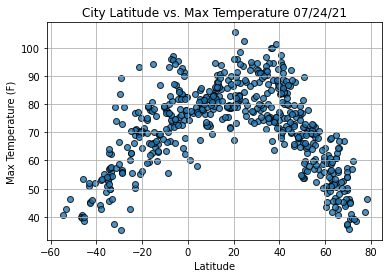

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


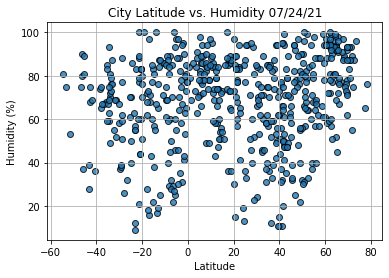

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

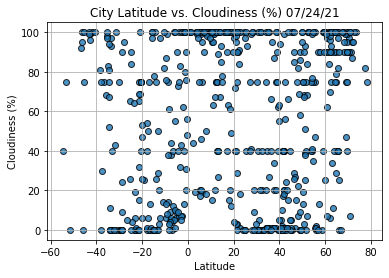

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

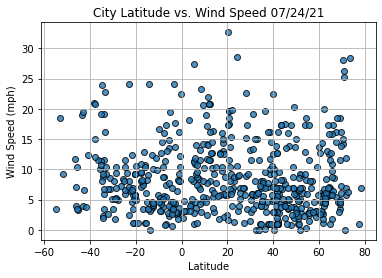

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()